# **ELECTRIC VEHICLE DATA ANALYSIS**

## Task - 1 : **EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### **Loading the data**

In [2]:
ev_data = pd.read_csv("vehicles_dataset.csv")

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
ev_data.shape

(112634, 17)

In [5]:
ev_data.columns = ev_data.columns.str.strip()
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

#### **Dealing with Missing Values**

In [7]:
for col in ev_data.columns :
    if ev_data[col].shape[0] != ev_data[col].count() :
        print(f"* There are {ev_data.shape[0]-ev_data[col].count()} missing values in the column '{col}'")
print(f"There are {ev_data.isnull().any(axis=1).sum()} rows that contain missing values")


* There are 20 missing values in the column 'Model'
* There are 286 missing values in the column 'Legislative District'
* There are 24 missing values in the column 'Vehicle Location'
* There are 443 missing values in the column 'Electric Utility'
There are 482 rows that contain missing values


In [8]:
print(f"{round((482/112634)*100,2)}% of the dataset has missing values")

0.43% of the dataset has missing values


In [9]:
ev_data = ev_data.dropna()

#### **Dealing with duplicate records**

In [10]:
ev_data.duplicated().sum()

np.int64(0)

* No duplicate rows are there in this dataset

In [11]:
ev_data.shape

(112152, 17)

#### **Gathering basic info about all variables**

I perform this step, to gather more information about the contents in this dataset. Domain knowledge is crucial for performing right & impactful analysis of the data. This is an open-ended problem. The only information given is that the data is about electric vehicles. To know :

* what each variable/feature indicate
* how the data is structured
* what is the type of each variable ie. categorical / numeric/ continuous/ discrete etc.
* to fix the data type of each column
* to fix the discrepancies in categorical column values

we use this 'just basic inspection' step.

1. **VIN(1-10)**

* VIN - Vehicle Identification Number
* has 10 uppercase alphanumeric characters
* each vehicle has a unique VIN

In [12]:
ev_data['VIN (1-10)'][0:4]

2    JN1AZ0CP8B
3    1G1FW6S08H
4    3FA6P0SU1K
5    5YJ3E1EB5J
Name: VIN (1-10), dtype: object

In [13]:
ev_data['VIN (1-10)'] = ev_data['VIN (1-10)'].astype('str').str.strip()

In [14]:
ev_data['VIN (1-10)'].describe()

count         112152
unique          7522
top       5YJYGDEE9M
freq             471
Name: VIN (1-10), dtype: object

* 7522 unique values are present in this column
* '5YJYGDEE9M' is the most frequently occurring VIN in this dataset. It occurs in 471 records in this dataset

**Q :** Data about how many unique vehicles are present in this dataset?

7522 electric vehicles

**NOTE** : 7,522 is less than the total number of records in this dataset viz. 1,12,152. This implies that for any unique vehicle there are multiple distinct records (not duplicate records). iow. each record has different information about a single vehicle. What are these different information? To find this out, let's examine the dataframe subset for a unique vehicle, say the vehicle with VIN 1G1FW6S08H.

In [15]:
ev_data[ev_data['VIN (1-10)']=='1G1FW6S08H'].head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4272,1G1FW6S08H,Thurston,Olympia,WA,98501,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,343717,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067011200
4354,1G1FW6S08H,Benton,Kennewick,WA,99336,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,8.0,217039329,POINT (-119.11698 46.20804),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,53005010809
4390,1G1FW6S08H,Thurston,Olympia,WA,98501,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,187593248,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067011200
4574,1G1FW6S08H,Thurston,Olympia,WA,98501,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,138003988,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067011200


##### **Features that remain constant for any EV**

**Q :** For any subset corresponding to a unique EV, find out all the columns which have same value in all records.

In [16]:
const_features = []
print('The features that remain constant for any EV :')
for col in ev_data[ev_data['VIN (1-10)']=='1G1FW6S08H'].columns :
    if len(ev_data[ev_data['VIN (1-10)']=='1G1FW6S08H'][col].unique()) == 1 :
        print(col)
        const_features.append(col)

The features that remain constant for any EV :
VIN (1-10)
State
Model Year
Make
Model
Electric Vehicle Type
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Electric Range
Base MSRP


* Out of the 17 features, 9 remain constant for any electric vehicle

Let's find out what these features mean!!!

2. **State**

Indicates the state in which the vehicle is registered. This is important for understanding state-specific regulations, incentives for EV adoption, and geographic trends in EV ownership.

In [17]:
ev_data['State'] = ev_data['State'].astype('str').str.strip().str.capitalize()

In [18]:
ev_data['State'].describe()

count     112152
unique         1
top           Wa
freq      112152
Name: State, dtype: object

* So, this whole dataset talks about EVs being used in Waashington State, US

3. **Model Year**

This indicates the year in which the vehicle model was manufactured or released. It helps in understanding trends in EV adoption over time and the evolution of technology in electric vehicles.

In [19]:
ev_data['Model Year'][0:4]

2    2011
3    2017
4    2019
5    2018
Name: Model Year, dtype: int64

* pandas has recognised this column as integer datatype although its year of datetime data type

In [20]:
ev_data['Model Year'] = pd.to_datetime(ev_data['Model Year'], format='%Y', yearfirst=True)

In [21]:
ev_data['Model Year'][0:4]

2   2011-01-01
3   2017-01-01
4   2019-01-01
5   2018-01-01
Name: Model Year, dtype: datetime64[ns]

In [22]:
ev_data['Model Year'] = ev_data['Model Year'].dt.year

In [23]:
ev_data['Model Year'].describe()

count    112152.000000
mean       2019.004494
std           2.891859
min        1997.000000
25%        2017.000000
50%        2020.000000
75%        2022.000000
max        2023.000000
Name: Model Year, dtype: float64

* this dataset has data regarding electric vehicle models as old as 1997
* also it has data regarding latest ev models of the year 2023 as well

In [24]:
ev_data['Model Year'].unique()

array([2011, 2017, 2019, 2018, 2013, 2016, 2020, 2021, 2022, 2015, 2014,
       2012, 2023, 2010, 2008, 2000, 1997, 1999, 1998, 2002], dtype=int32)

4. **Make**

Refers to the manufacturer or brand of the vehicle, such as Tesla, Nissan, Chevrolet, etc. This information is important for analyzing market shares, manufacturer-specific trends, and consumer preferences.

In [25]:
ev_data['Make'] = ev_data['Make'].astype('str').str.strip().str.capitalize()

In [26]:
ev_data['Make'].describe()

count     112152
unique        34
top        Tesla
freq       51883
Name: Make, dtype: object

* 34 unique ev manufacturing brands can be seen in this dataset
* Tesla is the toppest with frequency of occurrence 51,883

5. **Model**

Specifies the specific model name of the vehicle (e.g., Tesla Model 3, Nissan Leaf, Chevrolet Bolt). This level of detail allows for a better understanding of which specific vehicles are popular among consumers and how different models perform in terms of sales, efficiency, and consumer satisfaction.

In [27]:
ev_data['Model'] = ev_data['Model'].astype('str').str.strip().str.capitalize()

In [28]:
ev_data['Model'].describe()

count      112152
unique        114
top       Model 3
freq        23042
Name: Model, dtype: object

* there are 114 unique ev models in this dataset

In [29]:
len(ev_data[(ev_data['Make']=='Tesla') & (ev_data['Model']=='Model 3')]['VIN (1-10)'].unique())

179

**Q :** Find out the top selling models for each of the top 10 ev manufacturers.

* the data for each 

In [30]:
grp_1 = ev_data.groupby(['VIN (1-10)', 'Make'])['Model'].first().reset_index()
grp_1

,VIN (1-10),Make,Model
0,1C4JJXP60M,Jeep,Wrangler
1,1C4JJXP60N,Jeep,Wrangler
2,1C4JJXP61M,Jeep,Wrangler
3,1C4JJXP61N,Jeep,Wrangler
4,1C4JJXP62M,Jeep,Wrangler
...,...,...,...
7517,YV4H60DZ5N,Volvo,Xc60
7518,YV4H60DZ6N,Volvo,Xc60
7519,YV4H60DZ7N,Volvo,Xc60
7520,YV4H60DZ8N,Volvo,Xc60


In [31]:
grp_1[(grp_1['Make']=='Tesla') & (grp_1['Model']=='Model 3')]

,VIN (1-10),Make,Model
2286,5YJ3E1E19J,Tesla,Model 3
2287,5YJ3E1EA0H,Tesla,Model 3
2288,5YJ3E1EA0J,Tesla,Model 3
2289,5YJ3E1EA0K,Tesla,Model 3
2290,5YJ3E1EA0L,Tesla,Model 3
...,...,...,...
2460,5YJ3E1EC9P,Tesla,Model 3
2461,5YJ3E1ECXL,Tesla,Model 3
2462,5YJ3E1ECXM,Tesla,Model 3
2463,5YJ3E1ECXN,Tesla,Model 3


6. **Electric Vehicle Type**

In [32]:
# what are the typical values in this column?
ev_data['Electric Vehicle Type'][0:4]

2            Battery Electric Vehicle (BEV)
3            Battery Electric Vehicle (BEV)
4    Plug-in Hybrid Electric Vehicle (PHEV)
5            Battery Electric Vehicle (BEV)
Name: Electric Vehicle Type, dtype: object

* So, this variable refers to the type of the EV based on the technology used for charging

In [33]:
# converting the column values into string data type - astype method
# removing unnecessary spaces from the end and beginning of the column values - strip method
# capitalizing only the 1st letters of each word in each column value - title method
ev_data['Electric Vehicle Type'] = ev_data['Electric Vehicle Type'].astype('str').str.strip().str.title()

In [34]:
ev_data['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (Bev)',
       'Plug-In Hybrid Electric Vehicle (Phev)'], dtype=object)

There are only 2 types of electric vehicles in this dataset :

1. Battery EV : These vehicles rely only on an electric battery to store energy, with no internal combustion engine. These vehicles need to be charged via an external power source.

2. Plug-In Hybrid EV : These vehicles use both electric motor and a traditional internal combustion engine. They can be charged externally and can run on electric power for a certain range before switching to gasoline

7. **Clean Alternative Fuel Vehicle (CAFV) Eligibility**

Clean alternative fuels are fuels that produce fewer pollutants compared to traditional fuels like gasoline or diesel fuels. These are used in vehicles to reduce greenhouse gas emissions, improve air quality, and reduce dependence on fossil fuels. Eg. electricity, hydrogen, CNG, LPG, RNG, biofuels etc.

CAFV eligibility of an ev tells if it qualify for state or federal incentives related to clean energy or alternative fuel use. These programs are designed to promote the use of low-emission or zero-emission vehicles.

In [35]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'][0:4]

2    Clean Alternative Fuel Vehicle Eligible
3    Clean Alternative Fuel Vehicle Eligible
4      Not eligible due to low battery range
5    Clean Alternative Fuel Vehicle Eligible
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: object

In [36]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('str').str.strip().str.title()

In [37]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not Eligible Due To Low Battery Range',
       'Eligibility Unknown As Battery Range Has Not Been Researched'],
      dtype=object)

* so, this is a categorical variable with 3 categories

8. **Electric Range**

In [38]:
ev_data['Electric Range'][0:4]

2     73
3    238
4     26
5    215
Name: Electric Range, dtype: int64

Electric range refers to the distance an electric vehicle (EV) can travel on a single full charge of its battery. This metric is crucial for EV users, as it determines how far they can go before needing to recharge.

* This is a **numeric variable provided we take the 7,522 records only corresponding to unique VINs**.

9. **Base MSRP**

In [39]:
ev_data['Base MSRP'][0:10]

2         0
3         0
4         0
5         0
6         0
7         0
8         0
9     31950
10        0
11        0
Name: Base MSRP, dtype: int64

Base MSRP stands for Base Manufacturer's Suggested Retail Price, which is the price that the manufacturer recommends a retailer sell a vehicle for, before adding any optional features, destination charges, taxes, or incentives. It represents the cost of the vehicle in its most basic form or configuration.

The Base MSRP is the price displayed while advertising. This price can increase based on optional features or packages (e.g., premium sound systems, advanced safety features), additional dealership fees or markups, regional adjustments or rebates.

* This is a numeric column when we consider only those 7522 records corresponding to the unique EVs

**Q :** Base MSRP is 0 in some records. What are the possible reasons?

**A :**

* The dataset may not have accurate pricing information for that specific vehicle, may be because the vehicle is a prototype, not yet released, or missing data from the manufacturer.

* Some vehicles, especially those intended for commercial fleets or special purposes, may not have a publicly available MSRP.

* Vehicles used for research, governmental purposes, or non-commercial applications may not have an MSRP

* Occasionally, vehicles may be part of a promotional campaign where the MSRP is not set or temporarily marked as zero to encourage inquiries.

##### **Features that keep changing for any EV**

**Q :** For any subset corresponding to a unique EV, find out all the columns which have different values in more than 1 records.

In [40]:
print('Features that keep changing for any EV :')
for col in ev_data[ev_data['VIN (1-10)']=='3FA6P0SU1K'].columns :
    if len(ev_data[ev_data['VIN (1-10)']=='3FA6P0SU1K'][col].unique()) >1 :
        print(col)

Features that keep changing for any EV :
County
City
Postal Code
Legislative District
DOL Vehicle ID
Vehicle Location
Electric Utility
2020 Census Tract


Let's find out why these features keep changing for any EV. That way we can get more insight into the data collection, problem statement etc. This will be useful for effective data retrieval too !!!

**Counties, cities, postal codes, legislative district, vehicle location, 2020 census tract, electric utitlity** etc. probably represent, where the vehicle was charged or used rather than where it was registered. This could be important for analyzing travel patterns, infrastructure utilization, or energy consumption across regions.

1. **County**

A county is a specific region of a state or country. While the United States is made up of 50 states, it also has over 3000 counties. In the U.S

In [41]:
ev_data['County'].describe()

count     112152
unique        39
top         King
freq       58980
Name: County, dtype: object

* data from only 39 counties from Washington state has been recorded in this dataset.

2. **City**

Represents the city in which the vehicle is being used or charged. 

In [42]:
ev_data['City'] = ev_data['City'].astype('str').str.strip().str.title()

In [43]:
ev_data['City'].describe()

count      112152
unique        434
top       Seattle
freq        20295
Name: City, dtype: object

* data from only 434 cities in the Washington state has been collected in this dataset

3. **Legislative District**

* legislative districts are numerical designations used by state legislatures and Congress to define electoral regions 
* Each state in the U.S. is divided into a number of legislative districts, with each district represented by an elected official in the state legislature (House or Senate) or in the U.S. House of Representatives
* in this case it represents from which electoral region the data record was collected

In [44]:
ev_data['Legislative District'][0:4]

2    15.0
3    39.0
4    38.0
5     1.0
Name: Legislative District, dtype: float64

* pandas has recognised this column as float data type, although these are integers

In [45]:
ev_data['Legislative District'] = ev_data['Legislative District'].astype('int')

In [46]:
ev_data['Legislative District'].nunique()

49

* in this dataset, we have data collected from 49 different districts

4. **DOL Vehicle ID**

* This ID might be used for tracking purposes across various jurisdictions, especially if the vehicle is part of a fleet or involved in inter-state operations.
* DOL-Dept. Of Liscensing


In [47]:
ev_data['DOL Vehicle ID'][0:20]

2     218972519
3     186750406
4       2006714
5     475635324
6     253546023
7     176817364
8     475900379
9     100489049
10    103317238
11      3214494
13    476126752
14    211534823
15    203204347
17    262138243
18    320712472
20    139647847
22    168414802
23    347122709
24    180189544
25    230229198
Name: DOL Vehicle ID, dtype: int64

* pandas has recognised this column as of integer data type
* the column has numeric values. However, they do not have an order relation viz. the case with ordinary numbers
* Instead they represent the ID given by DOL to the vehicle at different instances of time or for different purposes
* each such ID contains 9 digits or 7 digits 

In [48]:
ev_data['DOL Vehicle ID'].nunique()

112152

* There are 1,12,152 unique values in this column. This means that this column can be considered as the primary key for this table

5. **Vehicle Location**

In [49]:
ev_data['Vehicle Location'][0:4]

2    POINT (-120.50721 46.60448)
3     POINT (-121.7515 48.53892)
4    POINT (-122.20596 47.97659)
5     POINT (-122.18384 47.8031)
Name: Vehicle Location, dtype: object

* the vehicle location is represented in the format; POINT(longitude, latitude)
* it represents the location where the vehicle was charged or used

In [50]:
ev_data['Vehicle Location'].nunique()

516

* data where collected from 516 unique locations.

6. **Electric Utility**

In [51]:
ev_data['Electric Utility'][0:4]

2                PACIFICORP
3    PUGET SOUND ENERGY INC
4    PUGET SOUND ENERGY INC
5    PUGET SOUND ENERGY INC
Name: Electric Utility, dtype: object

In [52]:
ev_data['Electric Utility'] = ev_data['Electric Utility'].astype('str').str.strip().str.title()

In [53]:
ev_data['Electric Utility'].nunique()

73

**Q :** Find out the'top 10 most used electric utility service in this dataset.

In [54]:
ev_data['Electric Utility'].value_counts()[0:10]

Electric Utility
Puget Sound Energy Inc||City Of Tacoma - (Wa)                                      40231
Puget Sound Energy Inc                                                             22166
City Of Seattle - (Wa)|City Of Tacoma - (Wa)                                       21439
Bonneville Power Administration||Pud No 1 Of Clark County - (Wa)                    6522
Bonneville Power Administration||City Of Tacoma - (Wa)||Peninsula Light Company     5049
Puget Sound Energy Inc||Pud No 1 Of Whatcom County                                  2670
Bonneville Power Administration||Avista Corp||Inland Power & Light Company          1679
Bonneville Power Administration||Pud 1 Of Snohomish County                          1010
Pacificorp                                                                           847
Bonneville Power Administration||Pud No 1 Of Benton County                           802
Name: count, dtype: int64

17. **2020 Census Tract**

A census tract, census area, census district or meshblock is a geographic region defined for the purpose of taking a census

In [55]:
ev_data['2020 Census Tract'][0:10]

2     53077001602
3     53057951101
4     53061041500
5     53061051916
6     53061040900
7     53061042001
8     53029972100
9     53057940301
10    53067012221
11    53025010904
Name: 2020 Census Tract, dtype: int64

* census tract is represented 11-digit number
* pandas has recognised this column as of integer data type

In [56]:
len(ev_data['2020 Census Tract'].unique())

1760

* data from about 1,760 census tracts has been recorded in this dataset.

##### **Further Inspection**

In [57]:
ev_data[(ev_data['County']=='Thurston')][['City', 'Legislative District', 'Postal Code', '2020 Census Tract']]

,City,Legislative District,Postal Code,2020 Census Tract
10,Lacey,22,98516,53067012221
13,Rochester,20,98579,53067012730
22,Olympia,22,98502,53067010600
27,Olympia,35,98502,53067011902
33,Lacey,22,98503,53067011200
...,...,...,...,...
112468,Olympia,35,98501,53067011821
112477,Olympia,22,98501,53067010400
112532,Olympia,22,98502,53067012001
112546,Yelm,2,98597,53067012422


* Any state comprises many counties

* A county typically encompasses multiple cities and towns but can also include unincorporated areas

* eg. Olympia, Lacey, Yelm etc. are cities in Thurston county of Washington State and Rochester is an unincorporated community in Thurston County. While it is not a city or town, it is a significant community within the county, located southwest of Olympia

*  unincorporated communities does not have its own local government and falls under the jurisdiction of their respective county for administrative purposes

* Census tracts are small, relatively permanent subdivisions of a county

* Census tracts include portions of cities or be wholly within an unincorporated area

* Legislative districts often cut across cities, counties, and census tracts, as they are drawn to balance population rather than geographic boundaries

* postal codes are not exclusive to any single administrative boundary like a county or city. It’s used for organizing mail delivery within a specific geographic area. Last three digits correspond to specific town, city, or rural area

* it is likely that the DOL Vehicle ID is a unique identifier assigned by the licensing department to track every individual event, transaction, or record related to each vehicle. A DOL Vehicle ID might represent unique instances of vehicle registrations, transfers, inspections, or other activities, even for the same vehicle (same VIN).

#### **Univariate Analysis**

**Q :** Create a dataframe to store the data of vehicles. Make sure the 'VIN (1-10)' column is the primary key.

In [58]:
const_features.remove('VIN (1-10)')

In [59]:
evs = ev_data.groupby('VIN (1-10)')[const_features].first().reset_index()

In [60]:
evs.head()

,VIN (1-10),State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,1C4JJXP60M,Wa,2021,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,25,0
1,1C4JJXP60N,Wa,2022,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,21,0
2,1C4JJXP61M,Wa,2021,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,25,0
3,1C4JJXP61N,Wa,2022,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,21,0
4,1C4JJXP62M,Wa,2021,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,25,0


* each record in the 'evs' dataframe corresponds to a distinct electric vehicle with a unique VIN. 

**Q :** Based on the number of vehicles, find the top EV manufacturers.

In [61]:
top_makers = evs['Make'].value_counts()[0:10]
top_makers

Make
Tesla        1244
Chevrolet     735
Ford          640
Bmw           617
Volvo         599
Audi          539
Kia           441
Hyundai       424
Nissan        308
Porsche       273
Name: count, dtype: int64

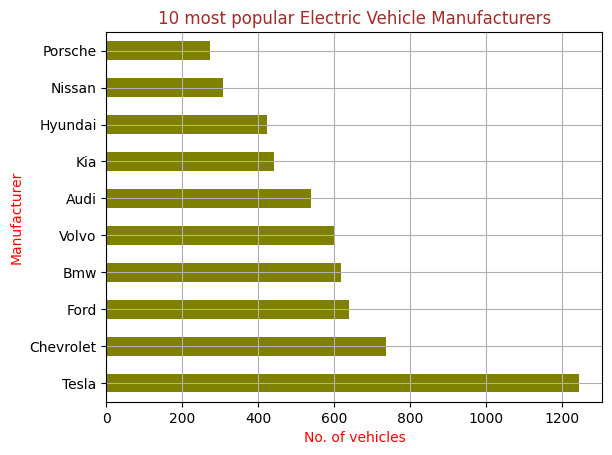

In [62]:
top_makers.plot(kind='barh', color='olive', grid=True)
plt.title('10 most popular Electric Vehicle Manufacturers', color='brown')
plt.xlabel('No. of vehicles', color='red')
plt.ylabel('Manufacturer', color='red')
plt.show()

According to the dataset we have, 

* Tesla is the most popular EV manufacturer. Over 1,200 vehicles of the total 7,522 vehicles in this dataset are made by Tesla
* Over 700 vehicles are made by Chevrolet, making it the 2nd most popular
* Each of Ford, BMW and Volvo has made close to 500 vehicles in this dataset

**Q :** Find out 10 most popular EV models and their respective brands.

Text(0.5, 1.0, '10 Most popular Electric Vehicle Models')

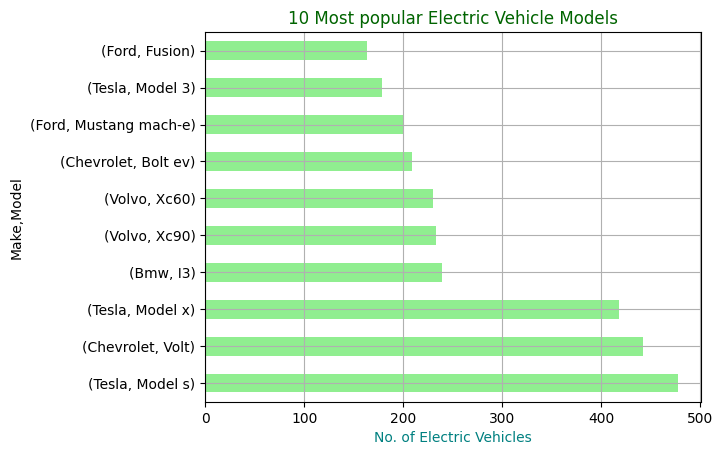

In [63]:
evs[evs['Make'].isin(list(top_makers.index)[0:5])].groupby('Make')['Model'].value_counts().sort_values(ascending=False)[0:10].plot(kind='barh', color='lightgreen', grid=True)
plt.xlabel('No. of Electric Vehicles', color='teal')
plt.title('10 Most popular Electric Vehicle Models', color='darkgreen')

* Tesla's Model S is the most popular EV in this dataset, with a count of about 475
* Chevrolet's Volt is the 2nd most populat EV, with a count of about 450
* Tesla's Model 3 is comparitively less popular, with only 180 EVs
* Tesla : Model S > Model X > Model 3
* Chevrolet : Volt > Bolt
* Ford : Mustang Mach - E > Fusion


**Q :**  Car manufacturers may produce the same model under different model years. For example, the same make and model might have variations for different years (e.g., 2020, 2021, 2022) as they introduce updates, redesigns, or new features. Find out 10 most popular EV model versions.

Text(0.5, 1.0, '10 Most popular EV Model Versions')

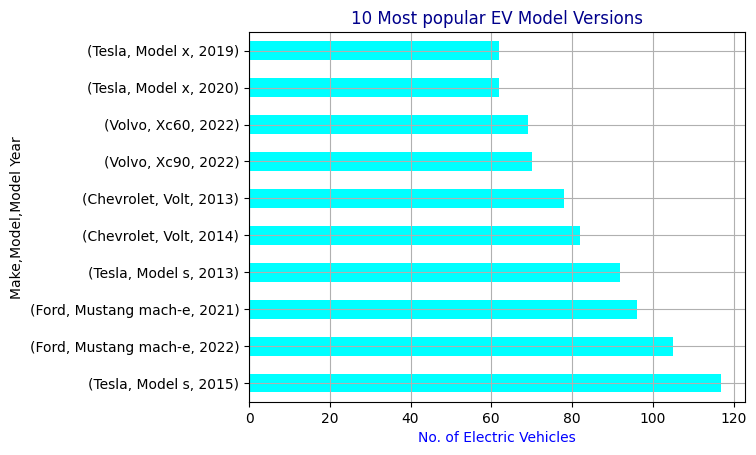

In [64]:
evs[evs['Make'].isin(list(top_makers.index)[0:5])].groupby('Make')[['Model', 'Model Year']].value_counts().sort_values(ascending=False)[0:10].plot(kind='barh', color='aqua',grid=True)
plt.xlabel('No. of Electric Vehicles', color='blue')
plt.title('10 Most popular EV Model Versions', color='darkblue')

* Tesla's Model S, 2015 version is the most popular with about 118 electric vehicles
* Tesla Model S : 2015 > 2013
* Latest versions of the same models are more popular

**Q :** Find out popularly used electric vehicle types.

Text(0.5, 0, 'No. of Vehicles')

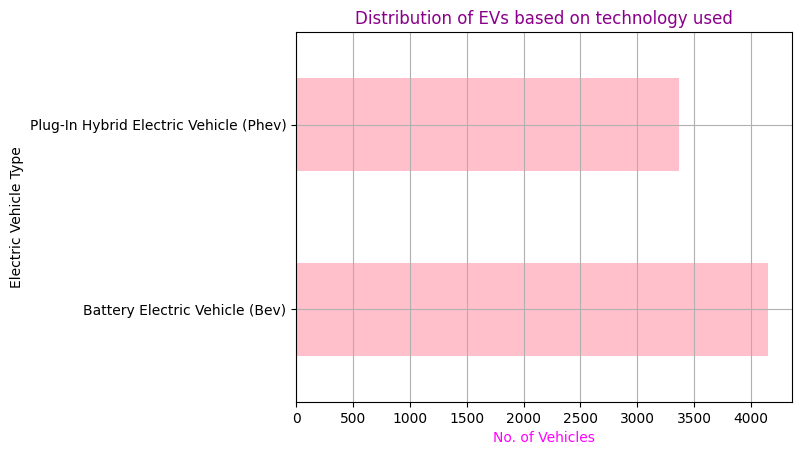

In [65]:
evs['Electric Vehicle Type'].value_counts().plot(kind='barh', color='pink', grid=True)
plt.title('Distribution of EVs based on technology used', color='darkmagenta')
plt.xlabel('No. of Vehicles', color='fuchsia')

* Over 4,000 vehicles in this dataset is Battery Electric vehicle
* About 3,250 vehicles in this dataset runs in hybrid mode

**Q :** Earlier while basic inspection of the dataset, 0 electric range was noted. These are records whose electric ranges where not recorded. How many such vehicles are present?

In [66]:
evs[evs['Electric Range']==0].shape[0]

1960

**Q :** Find out the distribution of electric range of electric vehicles in this dataset.

In [67]:
evs[evs['Electric Range']!=0]['Electric Range'].describe()

count    5562.000000
mean       87.690219
std        88.392785
min         6.000000
25%        21.000000
50%        38.000000
75%       150.000000
max       337.000000
Name: Electric Range, dtype: float64

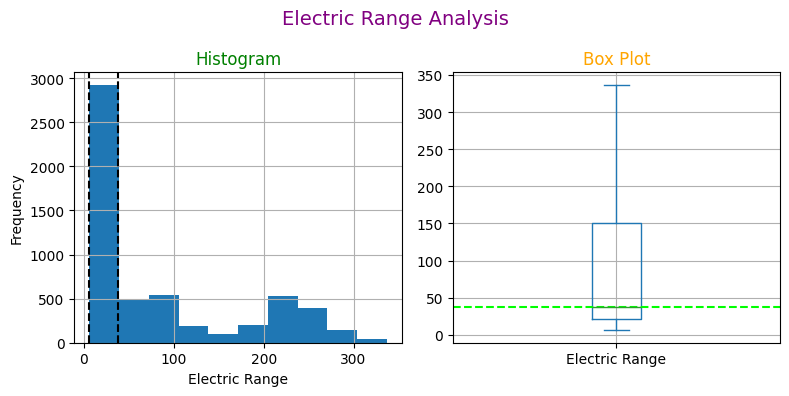

In [69]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

evs[evs['Electric Range']!=0]['Electric Range'].plot(kind='hist', ax=axes[0], grid=True)
ax=axes[0].set_xlabel('Electric Range')
ax=axes[0].set_title('Histogram', color='green')
ax=axes[0].axvline(6, color='black', linestyle='--')
ax=axes[0].axvline(38, color='black', linestyle='--')

evs[evs['Electric Range']!=0]['Electric Range'].plot(kind='box', ax=axes[1], grid=True)
ax=axes[1].set_title('Box Plot', color='orange')
ax=axes[1].axhline(38, color='lime', linestyle='--')



# Set a common title for the figure
fig.suptitle('Electric Range Analysis', fontsize=14, color='purple')

plt.tight_layout()
plt.show()


* from the KDE plot, it is clear that the distribution of electric ranges is not normal

**Histogram** :

* over 2,800 electric vehicles have low electric ranges between 6 and 38 miles
* over 1,000 electric vehicles have a bit higher electric ranges between 40 and 100 miles
* nearly 500 electric vehicles have electric ranges between 100 and 200 miles
* over 1,000 EVs have electric ranges between 200 and 300 miles
* less than 100 EVs have really high electric ranges greater than 300 miles

**Box Plot** :

* indicates a highly positively skewed destribution
* median electric range is 38 miles
* IQR is 21-150 miles

**Q :** Earlier during the basic inspection of the dataset, many vehicles with base MSRP 0 was found. These are probably missing values. How many such records are there?

In [70]:
evs[evs['Base MSRP']==0].shape[0]

6954

* Price of majority of the vehicles is not mentioned

**Q :** Find the distribution of base MSRP. 

In [71]:
evs[evs['Base MSRP']!=0]['Base MSRP'].describe()

count       568.000000
mean      62986.338028
std       41410.119265
min       31950.000000
25%       44100.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64

<Axes: >

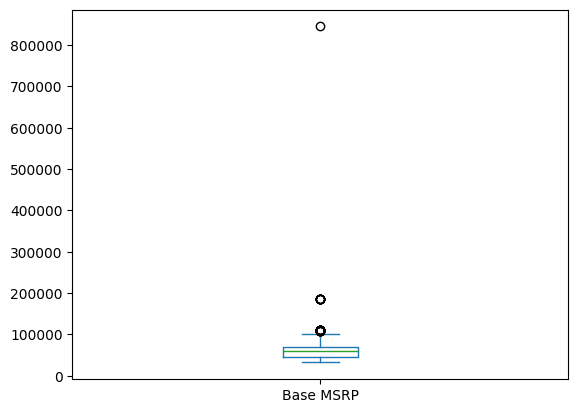

In [72]:
evs[evs['Base MSRP']!=0]['Base MSRP'].plot(kind='box')

* 3 outliers have been detected

In [73]:
# removing outliers
evs=evs[evs['Base MSRP']<=100000]

In [74]:
evs[evs['Base MSRP']!=0]['Base MSRP'].describe()

count      525.00000
mean     56631.12381
std      16437.29281
min      31950.00000
25%      43700.00000
50%      54950.00000
75%      69900.00000
max      98950.00000
Name: Base MSRP, dtype: float64

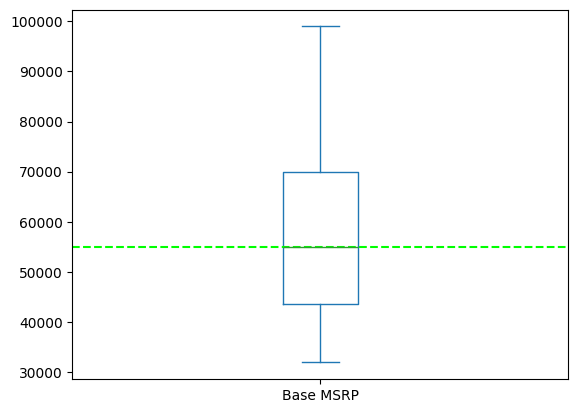

In [75]:
evs[evs['Base MSRP']!=0]['Base MSRP'].plot(kind='box')
plt.axhline(54950, color='lime', linestyle='--')

* Base MSRP of electric vehicles follow a positively skewed distribution
* median price is 54,950 USD
* mean price is 56,631 USD

**Q :** Find out the number of vehicles with any specific CAFV eligibility.

Text(0.5, 0, 'No. of Vehicles')

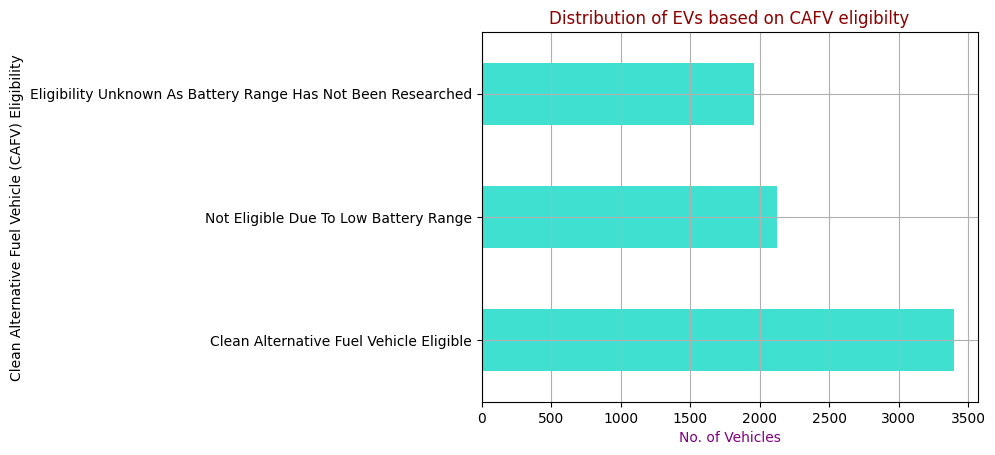

In [76]:
evs['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='barh', color='turquoise', grid=True)
plt.title('Distribution of EVs based on CAFV eligibilty', color='darkred')
plt.xlabel('No. of Vehicles', color='purple')

* most of the electric vehicles(nearly 3,250) have CAFV elegibility.
* nearly 2000 vehicle's CAFV eligibility is status is unknown.
* over 2,000 EVs are not eleigible for CAFV

**Q :** Find out the top 10 years according to the number of models released.

Text(0.5, 0, 'No. of models released')

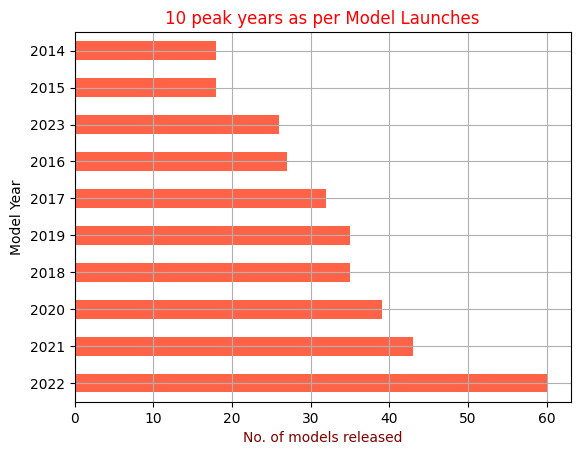

In [77]:
evs.groupby('Model Year')['Model'].nunique().sort_values(ascending=False)[0:10].plot(kind='barh', color='tomato', grid=True)
plt.title("10 peak years as per Model Launches", color='red')
plt.xlabel('No. of models released', color='maroon')

* there is a gradual increase in number of EV models released every year from 2014 to 2022
* number of models relased in 2023 is lower than that in 2022. This may be due to incomplete data collection

**Q :** In the evs dataframe, data about all unique vehicles are present. Add a column charging frequency to this dataframe.

* from the earlier inspection, it is clear that, each record in the ev_data dataframe corresponds to a charging event.
* for any unique EV, we define its charging frequency to be the number of times it was charged

In [78]:
# grouping by VIN and then finding number of records in each group
# number of records in a group --> number of charging events of a vehicle
charging_freq = ev_data.groupby('VIN (1-10)').size().reset_index().rename(columns={0:'charge_freq'})
charging_freq.head(3)

,VIN (1-10),charge_freq
0,1C4JJXP60M,34
1,1C4JJXP60N,26
2,1C4JJXP61M,44


In [79]:
# adding the charging frequency values to evs data frame
evs = pd.merge(evs, charging_freq, on='VIN (1-10)')

In [80]:
evs.head(3)

,VIN (1-10),State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,charge_freq
0,1C4JJXP60M,Wa,2021,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,25,0,34
1,1C4JJXP60N,Wa,2022,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,21,0,26
2,1C4JJXP61M,Wa,2021,Jeep,Wrangler,Plug-In Hybrid Electric Vehicle (Phev),Not Eligible Due To Low Battery Range,25,0,44


**Q :** Find out most popular electric utitlities.

Text(0.5, 0, 'No. of Charging Events')

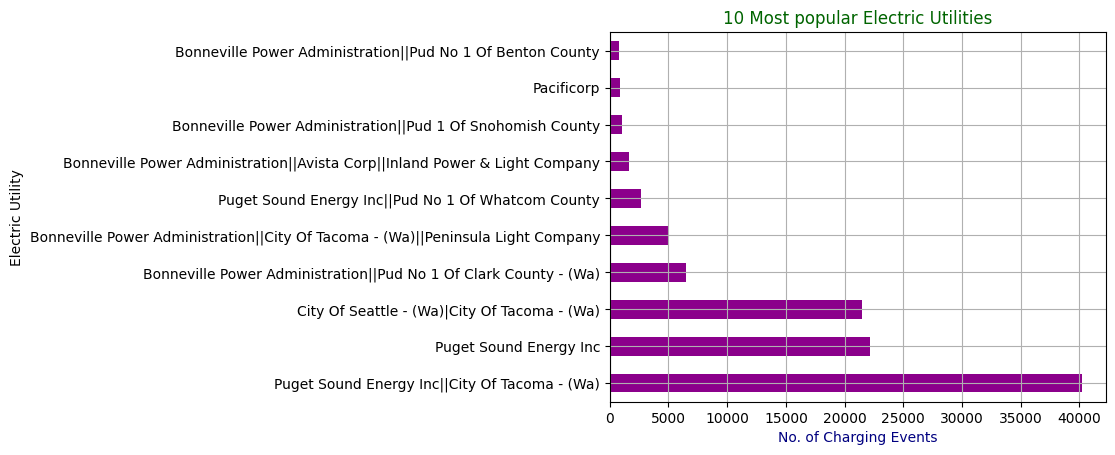

In [81]:
ev_data.groupby('Electric Utility').size().sort_values(ascending=False)[0:10].plot(kind='barh', color='darkmagenta', grid='True')
plt.title('10 Most popular Electric Utilities', color='darkgreen')
plt.xlabel('No. of Charging Events', color='navy')

* Puget Sound Energy Inc., in Tacoma city is the most popular EV charging station. Over 40,000 charging events has taken place in here.
* From the plot, it is also clear that Tacoma city is an EV charging hotspot

**Q :** Rank the counties based on charging events.

Text(0.5, 0, 'No. of Charging Events')

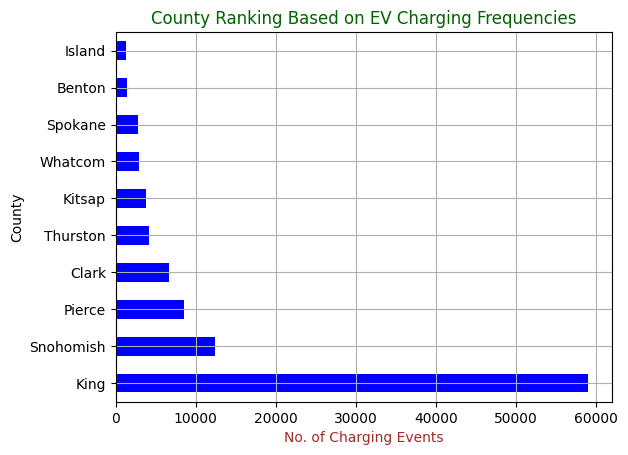

In [82]:
ev_data.groupby('County').size().sort_values(ascending=False)[0:10].plot(kind='barh', color='blue', grid=True)
plt.title('County Ranking Based on EV Charging Frequencies', color='darkgreen')
plt.xlabel('No. of Charging Events', color='brown')

* King County has significantly many EV traffic compared to other counties. Nearly 60,000 EV charging events have taken place in this region
* All other Counties are far behind King County with close to or less than 10,000 charging events

**Q :** Rank cities based on number of charging events.

Text(0.5, 0, 'No. of Charging Events')

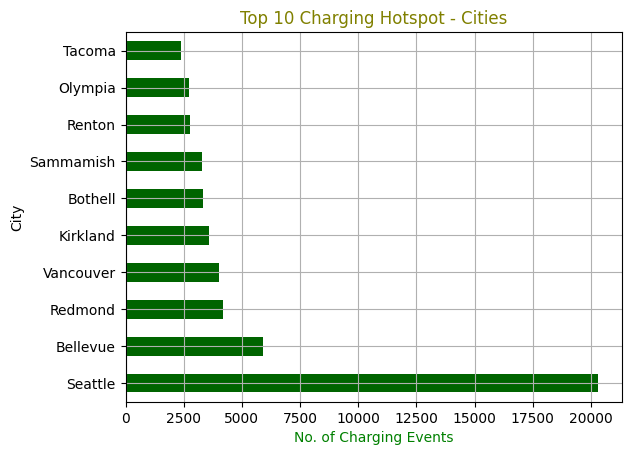

In [83]:
ev_data.groupby('City').size().sort_values(ascending=False)[0:10].plot(kind='barh', color='darkgreen', grid=True)
plt.title('Top 10 Charging Hotspot - Cities', color='olive')
plt.xlabel('No. of Charging Events', color='green')

* Seattle is the city with most EV traffic. Over 20,000 charging events have taken place here

#### **Bivariate Analysis**

**Q :** Is there a relationship between charging frequency and electric range of the vehicles?

Text(0.5, 1.0, 'Charging Frequency vs Electric Range')

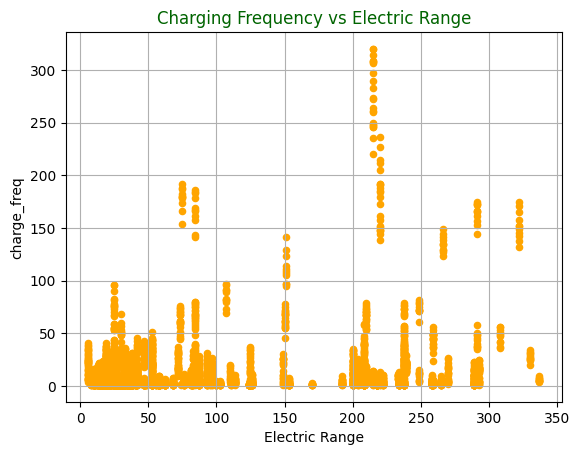

In [84]:
evs[evs['Electric Range']!=0].plot(kind='scatter', x='Electric Range', y='charge_freq', color='orange', grid=True)
plt.title('Charging Frequency vs Electric Range', color='darkgreen')

In [85]:
round(evs['Electric Range'].corr(evs['charge_freq']),2)

np.float64(0.11)

* there is a weak positive correlation
* ie., both variables either incresase or decrese together
* but the intensity of their togetherness is really low...almost 0

**Q :** Compare the charging frequency of a vehicle with its EV type.

<Axes: title={'center': 'charge_freq'}, xlabel='Electric Vehicle Type'>

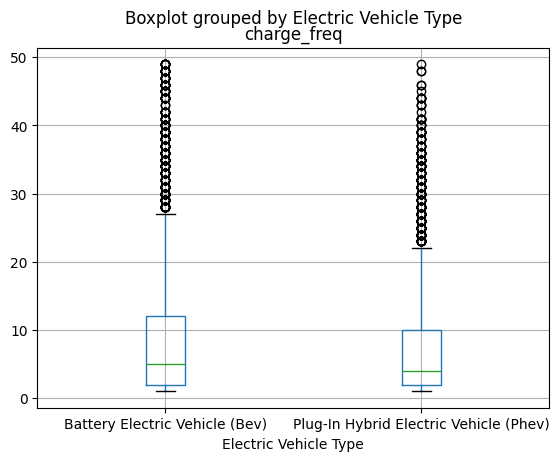

In [86]:
evs[evs['charge_freq']<50].boxplot(by='Electric Vehicle Type', column='charge_freq')

* charging frequency of both type of EVs follow a positively skewed distribution
* Median charging frequency of Battery EVs is sloghtly higher than Plug-in hybrid EV as expected

**Q :** Find out if there is a relationship  between brand of ev and their charging frequency?

<Axes: title={'center': 'charge_freq'}, xlabel='Make'>

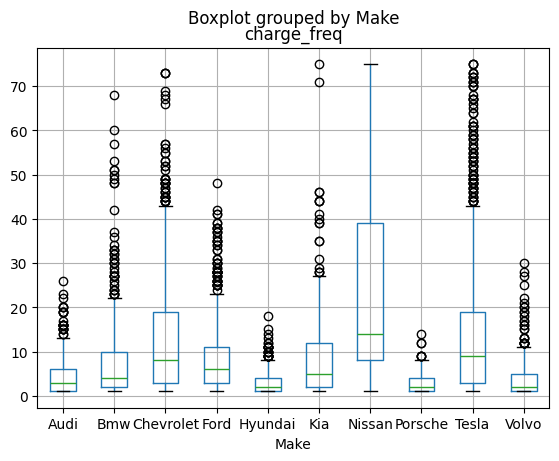

In [87]:
evs[(evs['charge_freq']<=75)&(evs['Make'].isin(list(top_makers.index)))].boxplot(by='Make', column='charge_freq')

* Median charging frequency of Nissan EVs is clearly higher than other EVs
* for all makers, distribution of charging frequency is right skewed and has outliers in the upper end

Text(0.5, 0, 'Avg. Charging Frequency')

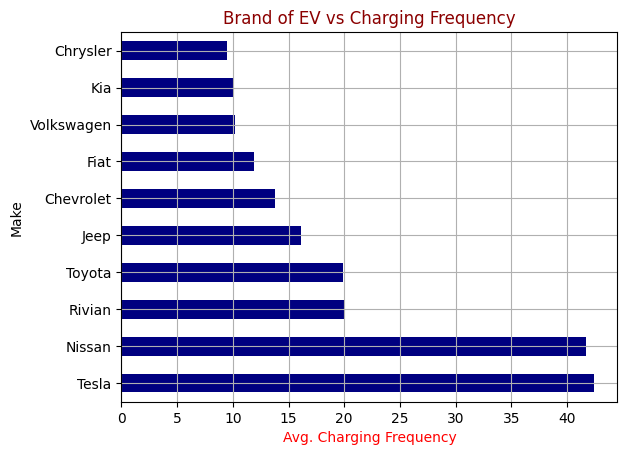

In [88]:
evs.groupby(['Make'])['charge_freq'].mean().sort_values(ascending=False)[0:10].plot(kind='barh',color='navy', grid=True)
plt.title('Brand of EV vs Charging Frequency', color='darkred')
plt.xlabel('Avg. Charging Frequency', color='red')

* Avg. charging frequency of EVs by Tesla and Nissan(over 40) is neck to neck, and is much higher compared to other EVs

**Q :** Rank the vehicle models based on the mean charging frequency of vehicles

Text(0.5, 0, 'Avg. Charging Frequency')

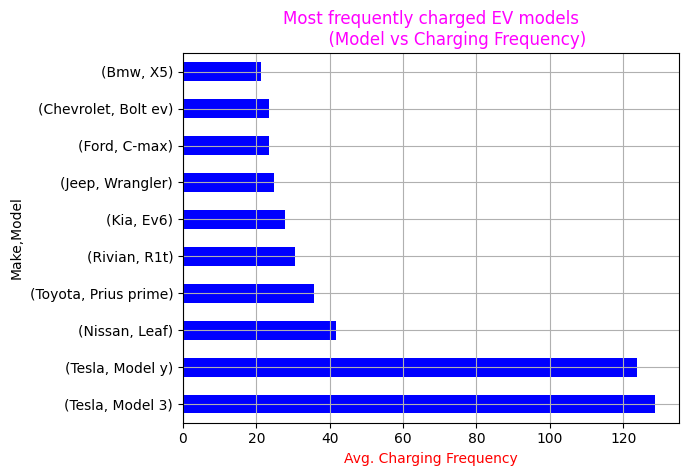

In [89]:
evs.groupby(['Make','Model'])['charge_freq'].mean().sort_values(ascending=False)[0:10].plot(kind='barh',color='blue', grid=True)
plt.title('''Most frequently charged EV models
          (Model vs Charging Frequency)''', color='fuchsia')
plt.xlabel('Avg. Charging Frequency', color='red')

* Tesla's Model 3 has highest average charging frequency of over 120

**Q :** Compare the electric ranges of BEVs and PHEVs

<Axes: title={'center': 'Electric Range'}, xlabel='Electric Vehicle Type'>

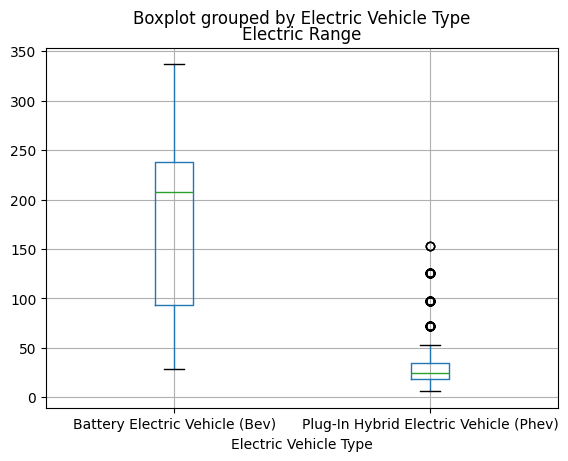

In [90]:
evs[evs['Electric Range']!=0].boxplot(by='Electric Vehicle Type', column='Electric Range')

* Electric range of BEVs is much higher than that of hybrid

**Q :** Findout top 10 energy efficient EV models

Text(0.5, 0, 'Avg Electric Range in miles')

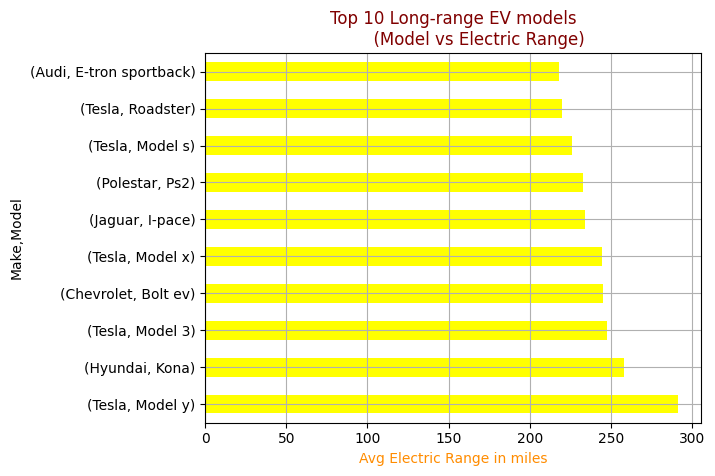

In [91]:
evs[evs['Electric Range']!=0].groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False)[0:10].plot(kind='barh', color='yellow', grid=True)
plt.title('''Top 10 Long-range EV models
          (Model vs Electric Range)''', color='maroon')
plt.xlabel('Avg Electric Range in miles', color='darkorange')

**Q :** Find out the top 10 costliest EV models.

Text(0.5, 1.0, '10 Most Expensive Electric Vehicle Models \n          (Model vs Base MSRP)')

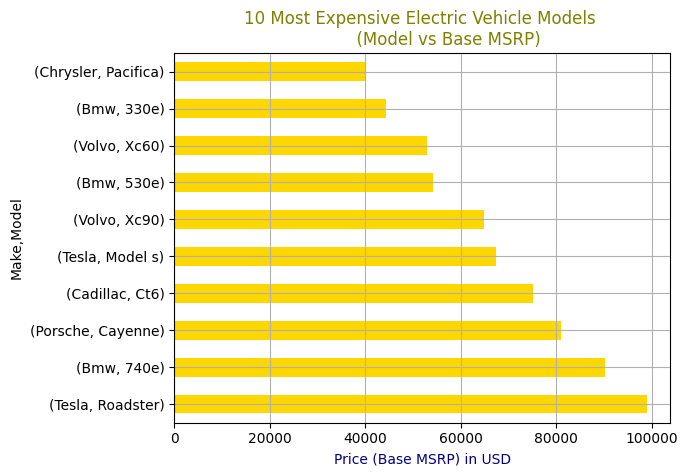

In [92]:
evs[evs['Base MSRP']!=0].groupby(['Make', 'Model'])['Base MSRP'].mean().sort_values(ascending=False)[0:10].plot(kind='barh', color='gold', grid=True)
plt.xlabel('Price (Base MSRP) in USD', color='navy')
plt.title('''10 Most Expensive Electric Vehicle Models 
          (Model vs Base MSRP)''', color='olive')

**Q :** Find out the relation between EV type and its CAFV eligibility.

In [93]:
tab = pd.crosstab(evs['Electric Vehicle Type'], evs['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],normalize='index')

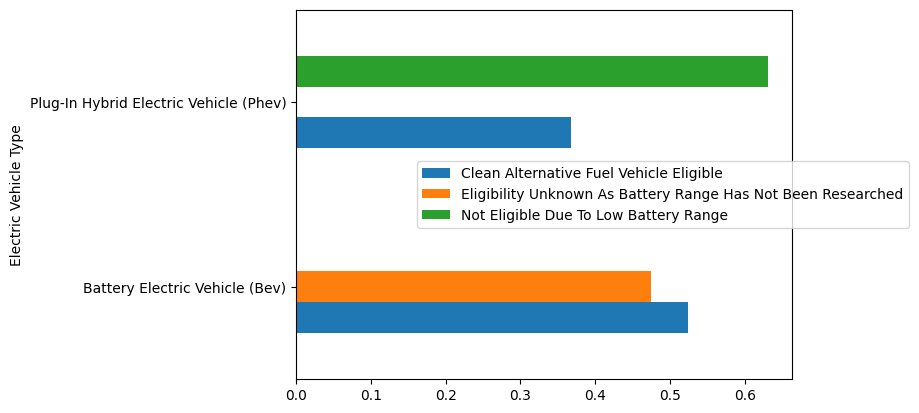

In [94]:
tab.plot(kind='barh')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [95]:
# to use evs dataframe for Task 3, I save it into a csv file
evs.to_csv("EV_data.csv", index=False)